# 1. Import libraries

In [2]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import nltk
import re


import os
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# 2. Load the data


In [3]:
# load data
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Let's take only first 10000 rows for the rest of the analysis for the ease of computation
df = pd.read_csv('/content/reviewsdata.csv')

In [5]:
df.head()

,Review,Label
0,the rock is destined to be the 21st century's ...,pos
1,"the gorgeously elaborate continuation of "" the...",pos
2,effective but too-tepid biopic,pos
3,if you sometimes like to go to the movies to h...,pos
4,"emerges as something rare , an issue movie tha...",pos


In [6]:
#shape of the dataset
df.shape

(10662, 2)

# 3. Removing stopwords and tokenization

In [7]:
df['Review'] = df['Review'].apply(lambda x:re.sub(r"[^A-Za-z0-9 ]+","",x))

In [8]:
df.head()

,Review,Label
0,the rock is destined to be the 21st centurys n...,pos
1,the gorgeously elaborate continuation of the ...,pos
2,effective but tootepid biopic,pos
3,if you sometimes like to go to the movies to h...,pos
4,emerges as something rare an issue movie that...,pos


In [9]:
from nltk.corpus import stopwords

#setting english stopwords
stopword_list = nltk.corpus.stopwords.words("english")

In [10]:
from nltk.tokenize import word_tokenize,sent_tokenize

def remove_stopwords(text):
  tokens = word_tokenize(text)
  ##Strip any extra spaces in each word of the list tokens
  tokens = [token.strip() for token in tokens]


  #Removing stop words from the tokens and creating a list containing only non-stopword tokens
  # Logic - convert each token in tokens to lowercase and check if it is a stopword.
  #If it is not a stopword, then add it to the filtered_tokens list

  filterted_tokens = []
  for token in tokens:
    if token.lower() not in stopword_list:
      filterted_tokens.append(token)
  # Individual tokens(words) are joined with whitespace as a separator to create a complete sentence
  filterted_text = " ".join(filterted_tokens)


  return filterted_text




In [11]:
len(df['Review'][678])

67

In [12]:
len(remove_stopwords(df['Review'][678]))

44

In [13]:
#Apply function on review column. Removing stopwords from each review in the dataframe
df['Review'] = df['Review'].apply(remove_stopwords)

In [14]:
df.head()

,Review,Label
0,rock destined 21st centurys new conan hes goin...,pos
1,gorgeously elaborate continuation lord rings t...,pos
2,effective tootepid biopic,pos
3,sometimes like go movies fun wasabi good place...,pos
4,emerges something rare issue movie thats hones...,pos


## 4.Stemming

In [15]:
#Import the necessary libraries
from nltk.stem import PorterStemmer

def simple_stemmer(text):
  porter = PorterStemmer()
  stemmed_words = []
  for word in word_tokenize(text):
    stem_word = porter.stem(word)
    stemmed_words.append(stem_word)

  return ' '.join(stemmed_words)


In [16]:
len(df['Review'][456])

145

In [17]:
len(simple_stemmer(df['Review'][456]))

124

In [18]:
# Applying stemming to all reviews in the dataframe column 'review'
df['Review_stemming'] = df['Review'].apply(simple_stemmer)

In [19]:
df.head()

,Review,Label,Review_stemming
0,rock destined 21st centurys new conan hes goin...,pos,rock destin 21st centuri new conan he go make ...
1,gorgeously elaborate continuation lord rings t...,pos,gorgeous elabor continu lord ring trilog huge ...
2,effective tootepid biopic,pos,effect tootepid biopic
3,sometimes like go movies fun wasabi good place...,pos,sometim like go movi fun wasabi good place start
4,emerges something rare issue movie thats hones...,pos,emerg someth rare issu movi that honest keenli...


### Lemmatization

In [20]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [21]:
def simple_lemmatizer(text):
  lemmatizer = WordNetLemmatizer()
  lemmatizer_words = []
  for word in word_tokenize(text):
    lemmatizing_word = lemmatizer.lemmatize(word)
    lemmatizer_words.append(lemmatizing_word)
  return ' '.join(lemmatizer_words)

In [22]:
len(df['Review'][456])

145

In [23]:
len(simple_lemmatizer(df['Review'][456]))

142

In [24]:
# Applying stemming to all reviews in the dataframe column 'review'
df['Review_lemmatizing'] = df['Review'].apply(simple_lemmatizer)

In [25]:
df.head()

,Review,Label,Review_stemming,Review_lemmatizing
0,rock destined 21st centurys new conan hes goin...,pos,rock destin 21st centuri new conan he go make ...,rock destined 21st century new conan he going ...
1,gorgeously elaborate continuation lord rings t...,pos,gorgeous elabor continu lord ring trilog huge ...,gorgeously elaborate continuation lord ring tr...
2,effective tootepid biopic,pos,effect tootepid biopic,effective tootepid biopic
3,sometimes like go movies fun wasabi good place...,pos,sometim like go movi fun wasabi good place start,sometimes like go movie fun wasabi good place ...
4,emerges something rare issue movie thats hones...,pos,emerg someth rare issu movi that honest keenli...,emerges something rare issue movie thats hones...


### Label Encoding sentiments

In [26]:
df.head()

,Review,Label,Review_stemming,Review_lemmatizing
0,rock destined 21st centurys new conan hes goin...,pos,rock destin 21st centuri new conan he go make ...,rock destined 21st century new conan he going ...
1,gorgeously elaborate continuation lord rings t...,pos,gorgeous elabor continu lord ring trilog huge ...,gorgeously elaborate continuation lord ring tr...
2,effective tootepid biopic,pos,effect tootepid biopic,effective tootepid biopic
3,sometimes like go movies fun wasabi good place...,pos,sometim like go movi fun wasabi good place start,sometimes like go movie fun wasabi good place ...
4,emerges something rare issue movie thats hones...,pos,emerg someth rare issu movi that honest keenli...,emerges something rare issue movie thats hones...


In [27]:
#Labelling the sentiment data.

#Label Binarizer converts Categorical data and outputs into a Numpy array of 0s and 1s. Label Binarizer is used to encode column data.

from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()

#Transformed sentiment data
df['Label']=lb.fit_transform(df['Label'])

In [28]:
### Check the DataFrame again
df.head()

,Review,Label,Review_stemming,Review_lemmatizing
0,rock destined 21st centurys new conan hes goin...,1,rock destin 21st centuri new conan he go make ...,rock destined 21st century new conan he going ...
1,gorgeously elaborate continuation lord rings t...,1,gorgeous elabor continu lord ring trilog huge ...,gorgeously elaborate continuation lord ring tr...
2,effective tootepid biopic,1,effect tootepid biopic,effective tootepid biopic
3,sometimes like go movies fun wasabi good place...,1,sometim like go movi fun wasabi good place start,sometimes like go movie fun wasabi good place ...
4,emerges something rare issue movie thats hones...,1,emerg someth rare issu movi that honest keenli...,emerges something rare issue movie thats hones...


# Additional Reading - Building Models using Bag of Words Model

In [29]:
norm_reviews = df.Review_lemmatizing

In [30]:
norm_reviews

0        rock destined 21st century new conan he going ...
1        gorgeously elaborate continuation lord ring tr...
2                                effective tootepid biopic
3        sometimes like go movie fun wasabi good place ...
4        emerges something rare issue movie thats hones...
                               ...                        
10657       terrible movie people nevertheless find moving
10658    many definition time waster movie must surely one
10659    stand crocodile hunter hurried badly cobbled l...
10660             thing look like madeforhomevideo quickie
10661                           enigma wellmade dry placid
Name: Review_lemmatizing, Length: 10662, dtype: object

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

#Creating a matrix with reviews in row and unique words as columns and frequency of word in review as values.
#Count vectorizer for bag of words
cv=CountVectorizer()

#Fitting model on entire data
cv_fit = cv.fit(norm_reviews)

In [32]:
#Calculating sentiment count. imdb['sentiment'] now has the cleaned review text
df['Label'].value_counts()

1    5331
0    5331
Name: Label, dtype: int64

In [33]:
# Split the data into training and train sets
from sklearn.model_selection import train_test_split
X_cv_fit_train, X_cv_fit_test, y_train, y_test = train_test_split(norm_reviews, df['Label'], test_size = 0.3, random_state = 1)

In [34]:
# Normalizing train reviews with bag of words model
X_cv_fit_train = cv_fit.transform(X_cv_fit_train)

#Normalised test reviews with bag of words model
X_cv_fit_test = cv_fit.transform(X_cv_fit_test)

In [35]:
print(X_cv_fit_train.shape)
print(X_cv_fit_test.shape)

(7463, 18402)
(3199, 18402)


In [36]:
# Build the logistic regression model for the data
from sklearn.linear_model import LogisticRegression

#Training the model
lr = LogisticRegression(penalty = 'l2', max_iter = 500, C=1, random_state=42).fit(X_cv_fit_train, y_train)


#Fitting the model for tf-idf features
lr_bow=lr.fit(X_cv_fit_train,y_train)
print(lr_bow)

LogisticRegression(C=1, max_iter=500, random_state=42)


In [37]:
y_pred_bow = lr_bow.predict(X_cv_fit_test)

In [38]:
## Model Evaluation
from sklearn.metrics import accuracy_score

print('Validation set Accuracy: %.3f' % accuracy_score(y_test,y_pred_bow))

Validation set Accuracy: 0.746


In [39]:
#Classification report for bag of words
from sklearn.metrics import classification_report
lr_bow_report=classification_report(y_test, y_pred_bow,target_names=['Positive','Negative'])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.74      0.75      0.75      1595
    Negative       0.75      0.74      0.75      1604

    accuracy                           0.75      3199
   macro avg       0.75      0.75      0.75      3199
weighted avg       0.75      0.75      0.75      3199



In [40]:
from sklearn.tree import DecisionTreeClassifier

#Training the model
dt = DecisionTreeClassifier().fit(X_cv_fit_train, y_train)


#Fitting the model for tf-idf features
dt_bow=dt.fit(X_cv_fit_train,y_train)
print(dt_bow)

DecisionTreeClassifier()


In [41]:
y_pred_bow = dt_bow.predict(X_cv_fit_test)

In [42]:
## Model Evaluation
from sklearn.metrics import accuracy_score

print('Validation set Accuracy: %.3f' % accuracy_score(y_test,y_pred_bow))

Validation set Accuracy: 0.647


In [43]:
#Classification report for bag of words
from sklearn.metrics import classification_report
dt_bow_report=classification_report(y_test, y_pred_bow,target_names=['Positive','Negative'])
print(dt_bow_report)

              precision    recall  f1-score   support

    Positive       0.64      0.67      0.65      1595
    Negative       0.65      0.63      0.64      1604

    accuracy                           0.65      3199
   macro avg       0.65      0.65      0.65      3199
weighted avg       0.65      0.65      0.65      3199



In [44]:
from sklearn.neighbors import KNeighborsClassifier

#Training the model
knn = KNeighborsClassifier().fit(X_cv_fit_train, y_train)


#Fitting the model for tf-idf features
knn_bow=knn.fit(X_cv_fit_train,y_train)
print(knn_bow)

KNeighborsClassifier()


In [45]:
y_pred_bow = knn_bow.predict(X_cv_fit_test)

In [46]:
## Model Evaluation
from sklearn.metrics import accuracy_score

print('Validation set Accuracy: %.3f' % accuracy_score(y_test,y_pred_bow))

Validation set Accuracy: 0.560


In [47]:
#Classification report for bag of words
from sklearn.metrics import classification_report
knn_bow_report=classification_report(y_test, y_pred_bow,target_names=['Positive','Negative'])
print(knn_bow_report)

              precision    recall  f1-score   support

    Positive       0.54      0.74      0.63      1595
    Negative       0.60      0.38      0.47      1604

    accuracy                           0.56      3199
   macro avg       0.57      0.56      0.55      3199
weighted avg       0.57      0.56      0.55      3199



In [48]:
from sklearn.ensemble import RandomForestClassifier

#Training the model
rf = RandomForestClassifier().fit(X_cv_fit_train, y_train)


#Fitting the model for tf-idf features
rf_bow=rf.fit(X_cv_fit_train,y_train)
print(rf_bow)


RandomForestClassifier()


In [49]:
y_pred_bow = rf_bow.predict(X_cv_fit_test)

In [50]:
## Model Evaluation
from sklearn.metrics import accuracy_score

print('Validation set Accuracy: %.3f' % accuracy_score(y_test,y_pred_bow))

Validation set Accuracy: 0.703


In [51]:
#Classification report for bag of words
from sklearn.metrics import classification_report
rf_bow_report=classification_report(y_test, y_pred_bow,target_names=['Positive','Negative'])
print(rf_bow_report)

              precision    recall  f1-score   support

    Positive       0.68      0.75      0.72      1595
    Negative       0.72      0.66      0.69      1604

    accuracy                           0.70      3199
   macro avg       0.70      0.70      0.70      3199
weighted avg       0.70      0.70      0.70      3199



##  Create a Tf-Idf object and fit the reviews

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

#Normalize the reviews for fitting the tf-idf model
norm_reviews = df.Review_lemmatizing

## Fit the tfidf_vectorizer
tv_fit = tfidf_vectorizer.fit(norm_reviews)

In [53]:
## Split the data into training and train sets
from sklearn.model_selection import train_test_split
X_tv_fit_train, X_tv_fit_test, y_train, y_test = train_test_split(norm_reviews, df['Label'], test_size = 0.3, random_state = 1)

In [54]:
# Normalizing train reviews with tfidf model
X_tv_fit_train = tv_fit.transform(X_tv_fit_train)

In [55]:
#Normalised test reviews with tfidf model
X_tv_fit_test = tv_fit.transform(X_tv_fit_test)

In [56]:
print(X_tv_fit_train.shape)
print(X_tv_fit_test.shape)

(7463, 18402)
(3199, 18402)


In [57]:
# Build the logistic regression model for the data
from sklearn.linear_model import LogisticRegression

#Training the model
lr = LogisticRegression(penalty = 'l2', max_iter = 500, C=1, random_state=42).fit(X_tv_fit_train, y_train)

In [58]:
## Model Evaluation
from sklearn.metrics import accuracy_score

# Predictions at threshold = 0.5
y_pred = lr.predict(X_tv_fit_test)

print('Validation set Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Validation set Accuracy: 0.751


In [59]:
#Classification report for tf-idf
from sklearn.metrics import classification_report
lr_bow_report=classification_report(y_test, y_pred,target_names=['Positive','Negative'])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.74      0.76      0.75      1595
    Negative       0.76      0.74      0.75      1604

    accuracy                           0.75      3199
   macro avg       0.75      0.75      0.75      3199
weighted avg       0.75      0.75      0.75      3199



In [60]:
from sklearn.tree import DecisionTreeClassifier

#Training the model
dt = DecisionTreeClassifier().fit(X_tv_fit_train, y_train)


#Fitting the model for tf-idf features
dt_bow=dt.fit(X_tv_fit_train,y_train)
print(dt_bow)

DecisionTreeClassifier()


In [61]:
## Model Evaluation
from sklearn.metrics import accuracy_score

# Predictions at threshold = 0.5
y_pred = dt_bow.predict(X_tv_fit_test)

print('Validation set Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Validation set Accuracy: 0.609


In [62]:
#Classification report for tf-idf
from sklearn.metrics import classification_report
dt_bow_report=classification_report(y_test, y_pred,target_names=['Positive','Negative'])
print(dt_bow_report)

              precision    recall  f1-score   support

    Positive       0.60      0.63      0.62      1595
    Negative       0.61      0.59      0.60      1604

    accuracy                           0.61      3199
   macro avg       0.61      0.61      0.61      3199
weighted avg       0.61      0.61      0.61      3199



In [63]:
from sklearn.neighbors import KNeighborsClassifier

#Training the model
knn = KNeighborsClassifier().fit(X_tv_fit_train, y_train)


#Fitting the model for tf-idf features
knn_bow=knn.fit(X_tv_fit_train,y_train)
print(knn_bow)

KNeighborsClassifier()


In [64]:
## Model Evaluation
from sklearn.metrics import accuracy_score

# Predictions at threshold = 0.5
y_pred = knn_bow.predict(X_tv_fit_test)

print('Validation set Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Validation set Accuracy: 0.695


In [65]:
#Classification report for tf-idf
from sklearn.metrics import classification_report
knn_bow_report=classification_report(y_test, y_pred,target_names=['Positive','Negative'])
print(knn_bow_report)

              precision    recall  f1-score   support

    Positive       0.70      0.68      0.69      1595
    Negative       0.69      0.71      0.70      1604

    accuracy                           0.70      3199
   macro avg       0.70      0.70      0.70      3199
weighted avg       0.70      0.70      0.70      3199



In [66]:
from sklearn.ensemble import RandomForestClassifier

#Training the model
rf = RandomForestClassifier().fit(X_tv_fit_train, y_train)


#Fitting the model for tf-idf features
rf_bow=rf.fit(X_tv_fit_train,y_train)
print(rf_bow)


RandomForestClassifier()


In [67]:
## Model Evaluation
from sklearn.metrics import accuracy_score

# Predictions at threshold = 0.5
y_pred = rf_bow.predict(X_tv_fit_test)

print('Validation set Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Validation set Accuracy: 0.690


In [68]:
#Classification report for tf-idf
from sklearn.metrics import classification_report
rf_bow_report=classification_report(y_test, y_pred,target_names=['Positive','Negative'])
print(rf_bow_report)

              precision    recall  f1-score   support

    Positive       0.66      0.78      0.71      1595
    Negative       0.73      0.60      0.66      1604

    accuracy                           0.69      3199
   macro avg       0.70      0.69      0.69      3199
weighted avg       0.70      0.69      0.69      3199



#### Build a deep learning model

In [69]:
import tensorflow as tf
from tensorflow import keras

In [70]:
## converting the sparse Tf-idf matrix to a sparse tensor


def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)

In [71]:
x_train_sparse_tensor = convert_sparse_matrix_to_sparse_tensor(X_tv_fit_train)

In [72]:
x_train_sparse_tensor_reordered = tf.sparse.reorder(x_train_sparse_tensor)

In [73]:
x_test_sparse_tensor = convert_sparse_matrix_to_sparse_tensor(X_tv_fit_test)

In [74]:
x_test_sparse_tensor_reordered = tf.sparse.reorder(x_test_sparse_tensor)

In [75]:
# Import methods for building neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [76]:
num_classes = 2

In [77]:
from keras.api._v2.keras import activations
def create_nn(activation_function, hidden1_neurons=256):
  input_layer = keras.Input(shape=18402,sparse=True)

  hidden1 = layers.Dense(units=hidden1_neurons,activation=activation_function)(input_layer)

  hidden2 = layers.Dense(units=64,activation=activation_function)(hidden1)

  output_layer = layers.Dense(units=1)(hidden2)

  model = keras.Model(inputs=input_layer, outputs=output_layer)

  return model



In [78]:
nn1 = create_nn(activation_function="relu",hidden1_neurons=256)

learning_rate = 0.01

nn1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
            loss='binary_crossentropy',
            metrics=['accuracy'])

nn1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18402)]           0         
                                                                 
 dense (Dense)               (None, 256)               4711168   
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4727681 (18.03 MB)
Trainable params: 4727681 (18.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [80]:
epochs = 10

history = nn1.fit(x_train_sparse_tensor_reordered,y_train,epochs=epochs,validation_data=(x_test_sparse_tensor_reordered, y_test))

Epoch 1/10
234/234 [==============================] - 6s 21ms/step - loss: 0.7412 - accuracy: 0.6848 - val_loss: 0.6713 - val_accuracy: 0.7471
Epoch 2/10
234/234 [==============================] - 5s 23ms/step - loss: 0.4612 - accuracy: 0.8821 - val_loss: 1.6320 - val_accuracy: 0.7437
Epoch 3/10
234/234 [==============================] - 5s 20ms/step - loss: 0.3540 - accuracy: 0.9528 - val_loss: 2.7164 - val_accuracy: 0.7384
Epoch 4/10
234/234 [==============================] - 6s 24ms/step - loss: 0.2745 - accuracy: 0.9752 - val_loss: 3.3735 - val_accuracy: 0.7299
Epoch 5/10
234/234 [==============================] - 5s 19ms/step - loss: 0.2761 - accuracy: 0.9783 - val_loss: 3.2607 - val_accuracy: 0.7399
Epoch 6/10
234/234 [==============================] - 6s 24ms/step - loss: 0.2483 - accuracy: 0.9820 - val_loss: 3.3160 - val_accuracy: 0.7427
Epoch 7/10
234/234 [==============================] - 5s 20ms/step - loss: 0.2439 - accuracy: 0.9823 - val_loss: 3.3836 - val_accuracy: 0.7440

In [81]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,0.741172,0.684845,0.671269,0.747108
2,0.461175,0.882085,1.632024,0.743670
3,0.353956,0.952834,2.716429,0.738356
4,0.274536,0.975211,3.373511,0.729916
5,0.276063,0.978293,3.260735,0.739919
6,0.248334,0.982045,3.316015,0.742732
7,0.243919,0.982313,3.383641,0.743982
8,0.240298,0.983117,3.502897,0.744920
9,0.223743,0.984725,3.776975,0.727102


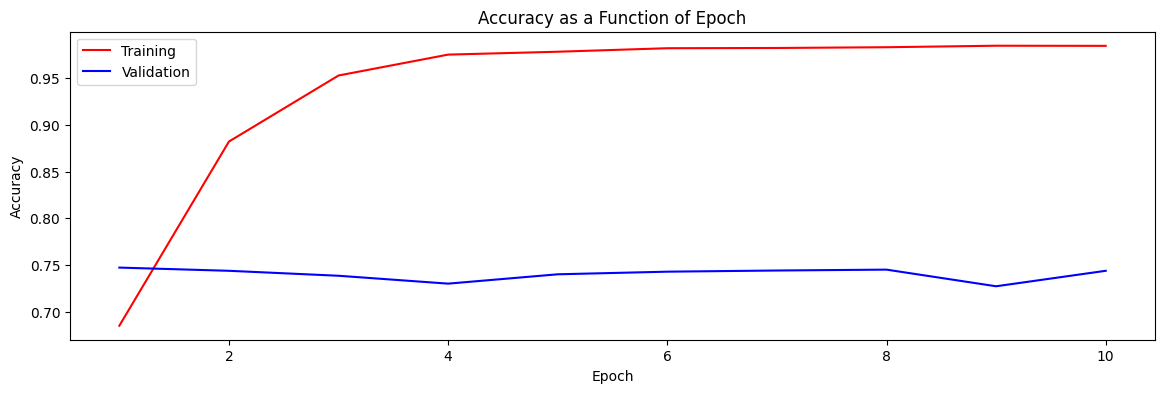

In [82]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [83]:
#Compute the accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = nn1.evaluate(x_test_sparse_tensor_reordered, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

100/100 [==============================] - 0s 2ms/step - loss: 3.5719 - accuracy: 0.7437
The loss value of the model on the test data is 3.571927785873413
The accuracy of the model on the test data is 0.743669867515564


### Hyperparameter Tuning


In [84]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import ParameterGrid

# Define hyperparameter values to search over
param_grid = {
    'activation_function': ['sigmoid', 'relu'],
    'hidden_neurons': [128, 256],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Create an empty DataFrame to store performance results
results_df = pd.DataFrame(columns=['Activation Function', 'Hidden Neurons', 'Learning Rate', 'Train Accuracy', 'Validation Accuracy'])

# Loop over hyperparameter combinations
for params in ParameterGrid(param_grid):
    # Extract hyperparameters
    activation_function = params['activation_function']
    hidden_neurons = params['hidden_neurons']
    learning_rate = params['learning_rate']

    # Create a neural network with the chosen hyperparameters
    nn_model = create_nn(activation_function, hidden_neurons)  # Example architecture, adjust as needed

    # Compile the model
    nn_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # Train the model
    history = nn_model.fit(x_train_sparse_tensor_reordered, y_train,
                           epochs=10,
                           validation_data=(x_test_sparse_tensor_reordered, y_test))

    # Extract train and validation accuracy from history
    train_accuracy = history.history['accuracy'][-1]
    validation_accuracy = history.history['val_accuracy'][-1]

    # Store the results in the DataFrame
    result_entry = pd.DataFrame([[activation_function, hidden_neurons, learning_rate,train_accuracy, validation_accuracy]],
                                columns=['Activation Function', 'Hidden Neurons', 'Learning Rate', 'Train Accuracy', 'Validation Accuracy'])
    results_df = pd.concat([results_df, result_entry], ignore_index=True)

# Print the results DataFrame
print(results_df)


Epoch 1/10
234/234 [==============================] - 3s 11ms/step - loss: 7.6338 - accuracy: 0.4994 - val_loss: 7.6032 - val_accuracy: 0.5014
Epoch 2/10
234/234 [==============================] - 3s 12ms/step - loss: 7.6338 - accuracy: 0.4994 - val_loss: 7.6032 - val_accuracy: 0.5014
Epoch 3/10
234/234 [==============================] - 2s 10ms/step - loss: 7.6338 - accuracy: 0.4994 - val_loss: 7.6032 - val_accuracy: 0.5014
Epoch 4/10
234/234 [==============================] - 2s 10ms/step - loss: 7.6338 - accuracy: 0.4994 - val_loss: 7.6032 - val_accuracy: 0.5014
Epoch 5/10
234/234 [==============================] - 2s 10ms/step - loss: 7.6338 - accuracy: 0.4994 - val_loss: 7.6032 - val_accuracy: 0.5014
Epoch 6/10
234/234 [==============================] - 3s 11ms/step - loss: 7.6338 - accuracy: 0.4994 - val_loss: 7.6032 - val_accuracy: 0.5014
Epoch 7/10
234/234 [==============================] - 2s 10ms/step - loss: 7.6338 - accuracy: 0.4994 - val_loss: 7.6032 - val_accuracy: 0.5014

In [85]:
results_df

,Activation Function,Hidden Neurons,Learning Rate,Train Accuracy,Validation Accuracy
0,sigmoid,128,0.001,0.499397,0.501407
1,sigmoid,128,0.010,0.499397,0.501407
2,sigmoid,128,0.100,0.500603,0.498593
3,sigmoid,256,0.001,0.500603,0.498593
4,sigmoid,256,0.010,0.500603,0.498593
5,sigmoid,256,0.100,0.500603,0.498593
6,relu,128,0.001,0.991156,0.748671
7,relu,128,0.010,0.982179,0.749609
8,relu,128,0.100,0.499397,0.501407
9,relu,256,0.001,0.991960,0.738356


### Building the optimal model

In [86]:
## activation function = relu, hidden_neurons=128 and learning rate = 0.010 gives an optimal model

nn1 = create_nn(activation_function="relu",hidden1_neurons=128)

learning_rate = 0.010

nn1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
            loss='binary_crossentropy',
            metrics=['accuracy'])

nn1.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 18402)]           0         
                                                                 
 dense_39 (Dense)            (None, 128)               2355584   
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dense_41 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2363905 (9.02 MB)
Trainable params: 2363905 (9.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
epochs = 10

history = nn1.fit(x_train_sparse_tensor_reordered,y_train,epochs=epochs,validation_data=(x_test_sparse_tensor_reordered, y_test))

Epoch 1/10
234/234 [==============================] - 3s 10ms/step - loss: 0.6854 - accuracy: 0.6871 - val_loss: 0.9634 - val_accuracy: 0.7130
Epoch 2/10
234/234 [==============================] - 2s 9ms/step - loss: 0.4794 - accuracy: 0.8541 - val_loss: 0.7784 - val_accuracy: 0.7171
Epoch 3/10
234/234 [==============================] - 2s 9ms/step - loss: 0.4238 - accuracy: 0.9373 - val_loss: 1.8869 - val_accuracy: 0.7230
Epoch 4/10
234/234 [==============================] - 2s 9ms/step - loss: 0.3335 - accuracy: 0.9684 - val_loss: 2.6493 - val_accuracy: 0.7359
Epoch 5/10
234/234 [==============================] - 3s 13ms/step - loss: 0.2897 - accuracy: 0.9782 - val_loss: 3.4413 - val_accuracy: 0.7368
Epoch 6/10
234/234 [==============================] - 2s 9ms/step - loss: 0.2836 - accuracy: 0.9803 - val_loss: 3.4333 - val_accuracy: 0.7352
Epoch 7/10
234/234 [==============================] - 2s 9ms/step - loss: 0.2895 - accuracy: 0.9807 - val_loss: 3.5545 - val_accuracy: 0.7393
Epoc

In [88]:
 #Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,0.685434,0.687123,0.963408,0.713035
2,0.479384,0.854080,0.778355,0.717099
3,0.423804,0.937291,1.886903,0.723038
4,0.333515,0.968377,2.649312,0.735855
5,0.289689,0.978159,3.441268,0.736793
6,0.283579,0.980303,3.433251,0.735230
7,0.289521,0.980705,3.554537,0.739294
8,0.280512,0.981241,3.488014,0.740857
9,0.275609,0.981911,3.521664,0.738043


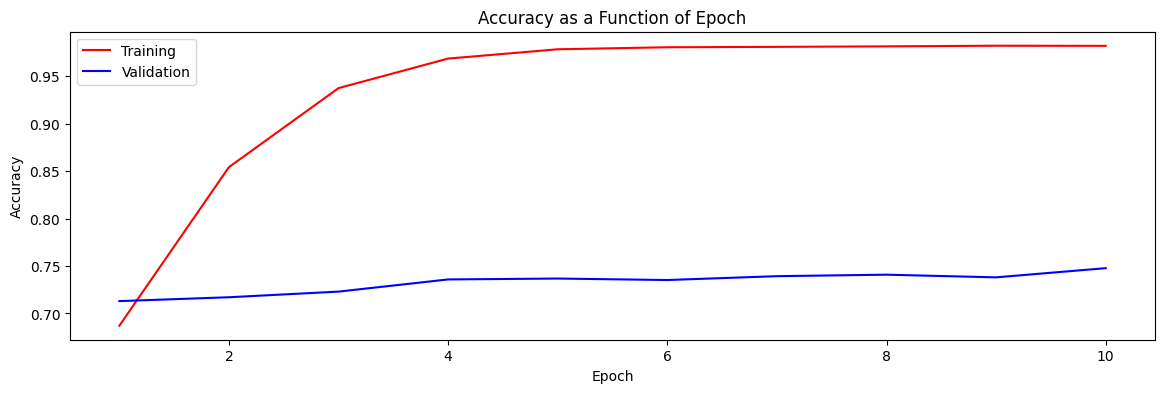

In [89]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [90]:
#Compute the accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = nn1.evaluate(x_test_sparse_tensor_reordered, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

100/100 [==============================] - 0s 2ms/step - loss: 3.5064 - accuracy: 0.7477
The loss value of the model on the test data is 3.506352186203003
The accuracy of the model on the test data is 0.7477336525917053


### Building the model with RNN

In [91]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [92]:
df.head()

,Review,Label,Review_stemming,Review_lemmatizing
0,rock destined 21st centurys new conan hes goin...,1,rock destin 21st centuri new conan he go make ...,rock destined 21st century new conan he going ...
1,gorgeously elaborate continuation lord rings t...,1,gorgeous elabor continu lord ring trilog huge ...,gorgeously elaborate continuation lord ring tr...
2,effective tootepid biopic,1,effect tootepid biopic,effective tootepid biopic
3,sometimes like go movies fun wasabi good place...,1,sometim like go movi fun wasabi good place start,sometimes like go movie fun wasabi good place ...
4,emerges something rare issue movie thats hones...,1,emerg someth rare issu movi that honest keenli...,emerges something rare issue movie thats hones...


In [93]:
x = df['Review_lemmatizing']
y = df['Label']

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [95]:
print("shape of x_train",x_train.shape)
print("shape of x_test",x_test.shape)

print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (7463,)
shape of x_test (3199,)
shape of y_train (7463,)
shape of y_test (3199,)


In [96]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

In [97]:
tokenizer.fit_on_texts(x_train)

In [98]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)


In [99]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

15453

In [100]:

max_sequence_length = 50

In [101]:


x_train = pad_sequences(x_train,padding='post',maxlen=max_sequence_length)
x_test = pad_sequences(x_test,padding='post',maxlen=max_sequence_length)



In [102]:
x_train.shape

(7463, 50)

In [103]:
max_features = 16000

In [104]:
model = Sequential()
embedding_dim = 32
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(SimpleRNN(256))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 128
epochs = 20
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/20
59/59 [==============================] - 10s 143ms/step - loss: 0.6984 - accuracy: 0.5107 - val_loss: 0.6909 - val_accuracy: 0.5233
Epoch 2/20
59/59 [==============================] - 6s 107ms/step - loss: 0.6289 - accuracy: 0.6539 - val_loss: 0.7560 - val_accuracy: 0.5411
Epoch 3/20
59/59 [==============================] - 8s 140ms/step - loss: 0.4660 - accuracy: 0.7861 - val_loss: 0.8235 - val_accuracy: 0.5939
Epoch 4/20
59/59 [==============================] - 7s 116ms/step - loss: 0.3035 - accuracy: 0.8761 - val_loss: 1.0382 - val_accuracy: 0.5542
Epoch 5/20
59/59 [==============================] - 9s 148ms/step - loss: 0.1922 - accuracy: 0.9246 - val_loss: 1.1966 - val_accuracy: 0.5964
Epoch 6/20
59/59 [==============================] - 7s 116ms/step - loss: 0.1402 - accuracy: 0.9491 - val_loss: 1.3782 - val_accuracy: 0.5827
Epoch 7/20
59/59 [==============================] - 9s 150ms/step - loss: 0.0722 - accuracy: 0.9766 - val_loss: 1.5578 - val_accuracy: 0.5971
Epoch

In [105]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential



model = Sequential()
embedding_dim = 32
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 128
epochs = 30
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/30
59/59 [==============================] - 36s 518ms/step - loss: 0.6935 - accuracy: 0.4938 - val_loss: 0.6932 - val_accuracy: 0.4930
Epoch 2/30
59/59 [==============================] - 31s 525ms/step - loss: 0.6822 - accuracy: 0.5354 - val_loss: 0.6864 - val_accuracy: 0.5255
Epoch 3/30
59/59 [==============================] - 30s 513ms/step - loss: 0.5387 - accuracy: 0.7417 - val_loss: 0.5639 - val_accuracy: 0.7237
Epoch 4/30
59/59 [==============================] - 35s 589ms/step - loss: 0.4158 - accuracy: 0.8467 - val_loss: 0.6056 - val_accuracy: 0.7255
Epoch 5/30
59/59 [==============================] - 31s 521ms/step - loss: 0.3162 - accuracy: 0.8833 - val_loss: 0.5955 - val_accuracy: 0.7399
Epoch 6/30
59/59 [==============================] - 30s 519ms/step - loss: 0.2196 - accuracy: 0.9305 - val_loss: 0.6349 - val_accuracy: 0.7412
Epoch 7/30
59/59 [==============================] - 31s 523ms/step - loss: 0.1441 - accuracy: 0.9610 - val_loss: 0.7447 - val_accuracy: 0.7405

In [106]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score



best_accuracy = 0
best_model = None
best_params = {}

# Define hyperparameters and their values to search
units_values = [64, 128, 256]
activation_values = ['sigmoid', 'relu']
dropout_values = [0.2, 0.3, 0.4]

# Iterate over hyperparameter combinations
for units in units_values:
    for activation in activation_values:
        for dropout_rate in dropout_values:
            # Create a new LSTM model with the current hyperparameters
            model = Sequential()
            model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
            model.add(LSTM(units=units, dropout=dropout_rate))
            model.add(Dense(units=1, activation=activation))
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

            # Train the model
            model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=0)

            # Evaluate the model on the validation set
            y_pred = model.predict(x_test)
            y_pred_rounded = np.round(y_pred)
            accuracy = accuracy_score(y_test, y_pred_rounded)

            # Check if this combination of hyperparameters is the best
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model
                best_params = {
                    'units': units,
                    'activation': activation,
                    'dropout_rate': dropout_rate
                }

# Print the best hyperparameters and their corresponding accuracy
print("Best Accuracy: %f" % best_accuracy)
print("Best Hyperparameters:", best_params)


100/100 [==============================] - 6s 55ms/step
Best Accuracy: 0.724914
Best Hyperparameters: {'units': 128, 'activation': 'relu', 'dropout_rate': 0.2}


In [107]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential



model = Sequential()
embedding_dim = 32
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(64,dropout=0.4))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 128
epochs = 30
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/30
59/59 [==============================] - 11s 149ms/step - loss: 0.9235 - accuracy: 0.5018 - val_loss: 0.6933 - val_accuracy: 0.5080
Epoch 2/30
59/59 [==============================] - 8s 128ms/step - loss: 0.6924 - accuracy: 0.5120 - val_loss: 0.6919 - val_accuracy: 0.5089
Epoch 3/30
59/59 [==============================] - 8s 128ms/step - loss: 0.6826 - accuracy: 0.5594 - val_loss: 0.6707 - val_accuracy: 0.5283
Epoch 4/30
59/59 [==============================] - 6s 100ms/step - loss: 0.6630 - accuracy: 0.7694 - val_loss: 0.5256 - val_accuracy: 0.7440
Epoch 5/30
59/59 [==============================] - 8s 132ms/step - loss: 0.4737 - accuracy: 0.7807 - val_loss: 0.5258 - val_accuracy: 0.7568
Epoch 6/30
59/59 [==============================] - 6s 101ms/step - loss: 0.2380 - accuracy: 0.9208 - val_loss: 0.5958 - val_accuracy: 0.7518
Epoch 7/30
59/59 [==============================] - 8s 135ms/step - loss: 0.1885 - accuracy: 0.9464 - val_loss: 1.3051 - val_accuracy: 0.7584
Epoch

comparing to RNN the LSTM works better on the sentiment analysis of movie reviews model.